Q1

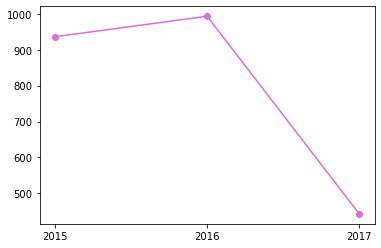

2015 936
2016 993
2017 443


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv('startup_funding.csv')
dates = df['Date'].str[-4:]

d = {}
for i in dates:
    d[i] = d.get(i,0) + 1

year = []
funding = []

for i in sorted(d.keys()):
    year.append(i)
    funding.append(d[i])

plt.plot(year,funding,color = 'orchid', marker = 'o')
plt.show()

for i in range(len(year)):
    print(year[i], end = " ")
    print(funding[i])

Q2

In [12]:
import pandas as pd
df=pd.read_csv("startup_funding.csv")
df["CityLocation"].replace(['bangalore','Bangalore/ Bangkok','Bangalore / SFO','Bangalore / USA','Bangalore / Palo Alto','Bangalore / San Mateo'],"Bangalore",inplace=True)
df["CityLocation"].replace(['Delhi','New Delhi / California','New Delhi / US','New Delhi/ Houston'],"New Delhi",inplace=True)
df["CityLocation"].replace(['Pune/Seattle','Pune / Dubai','Pune / US','Pune / Singapore'],'Pune',inplace=True)
df["CityLocation"].replace(['Mumbai / UK','Mumbai / NY','Mumbai / Global'],'Mumbai',inplace=True)
df["CityLocation"].replace(['Hyderabad/USA'],'Hyderabad',inplace=True)
df["CityLocation"].replace(['Chennai/ Singapore'],'Chennai',inplace=True)
df["CityLocation"].replace(['Noida / Singapore'],'Noida',inplace=True)
df["CityLocation"].replace(['Gurgaon / SFO'],'Gurgaon',inplace=True)
df["CityLocation"].replace(['Goa/Hyderabad'],'Goa',inplace=True)

City_Funding_info=df["CityLocation"].value_counts()
for k in range(10):
    print(City_Funding_info.index[k],City_Funding_info.values[k])

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


Q3

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def number(arr):
    num=""
    for i in arr:
        num+=i
    return int(num)
    pass

df=pd.read_csv("startup_funding.csv")
df["CityLocation"].fillna("NotAvailable",inplace=True)
df["CityLocation"].replace(['bangalore','Bangalore/ Bangkok','Bangalore / SFO','Bangalore / USA','Bangalore / Palo Alto','Bangalore / San Mateo'],"Bangalore",inplace=True)
df["CityLocation"].replace(['Delhi','New Delhi / California','New Delhi / US','New Delhi/ Houston'],"New Delhi",inplace=True)
df["CityLocation"].replace(['Pune/Seattle','Pune / Dubai','Pune / US','Pune / Singapore'],'Pune',inplace=True)
df["CityLocation"].replace(['Mumbai / UK','Mumbai / NY','Mumbai / Global'],'Mumbai',inplace=True)
df["CityLocation"].replace(['Hyderabad/USA'],'Hyderabad',inplace=True)
df["CityLocation"].replace(['Chennai/ Singapore'],'Chennai',inplace=True)
df["CityLocation"].replace(['Noida / Singapore'],'Noida',inplace=True)
df["CityLocation"].replace(['Gurgaon / SFO'],'Gurgaon',inplace=True)
df["CityLocation"].replace(['Goa/Hyderabad'],'Goa',inplace=True)
df["AmountInUSD"].fillna('0',inplace=True)
df["AmountInUSD"]=df["AmountInUSD"].apply(lambda x: number(x.split(',')))


City_list=list(df["CityLocation"].unique())
City_info=[]
for k in City_list:
    df_city=df[df["CityLocation"]==k]
    City_info.append([k,df_city["AmountInUSD"].sum()])
     
City_fundings=pd.DataFrame(City_info,columns=["CityLocation","TotalFundingAmount"])
City_fundings.sort_values("TotalFundingAmount",ascending=False,inplace=True)
City_fundings.drop(31,inplace=True)

Top_10_cities=City_fundings[0:10]

Top_10_cities["Percetage"]=Top_10_cities["TotalFundingAmount"].apply(lambda x: '%.2f'%(100*(x/Top_10_cities["TotalFundingAmount"].sum())))
for i in range(10):
    print(Top_10_cities.iloc[i][0],Top_10_cities.iloc[i][2])

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


C:\Users\Ambar\AppData\Local\Temp\ipykernel_4644\1724034894.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Top_10_cities["Percetage"]=Top_10_cities["TotalFundingAmount"].apply(lambda x: '%.2f'%(100*(x/Top_10_cities["TotalFundingAmount"].sum())))


Q4

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


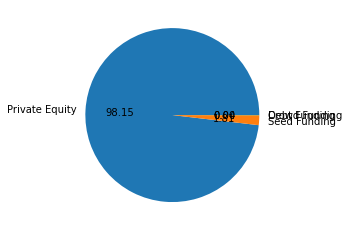

In [25]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('startup_funding.csv')
df['InvestmentType'].replace({'PrivateEquity':'Private Equity','SeedFunding':'Seed Funding','Crowd funding':'Crowd Funding'},inplace = True)
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(',','')))

filt = df.groupby('InvestmentType')['AmountInUSD'].sum().sort_values(ascending = False)

Amount = filt.values

for i in range(4):
    Amount[i] = float(("{:f}".format(Amount[i])))
    
Funding = ['Private Equity','Seed Funding','Debt Funding','Crowd Funding']
TotalSum = sum(Amount)
Percentage = []
for i in range(4):
    Percentage.append((Amount[i]/TotalSum)*100)
    Percentage[i] = f"{Percentage[i]:.2f}"
for i in range(4):
    print(Funding[i],Percentage[i])

plt.pie(Amount,labels=Funding,autopct='%.2f')
plt.show()

Q5

In [26]:
import pandas as pd
import numpy as np

def number(arr):
    num=""
    for i in arr:
        num+=i
    return int(num)

df=pd.read_csv("startup_funding.csv")
df["IndustryVertical"].replace(["ECommerce","ecommerce","eCommerce"],"Ecommerce",inplace=True)
df["AmountInUSD"].fillna('0',inplace=True)
df["AmountInUSD"]=df["AmountInUSD"].apply(lambda x: number(x.split(',')))

Industry_Info=[]
for Industry in list(df["IndustryVertical"].unique()):
    df_Industry=df[df["IndustryVertical"]==Industry]
    Industry_Info.append([Industry,df_Industry["AmountInUSD"].sum()])
    
Industry_Funding=pd.DataFrame(Industry_Info,columns=["Industry","Amount"])
Industry_Funding.sort_values("Amount",ascending=False,inplace=True)
Top5_Industry=Industry_Funding[0:5]
Top5_Industry["Percentage"]=Top5_Industry["Amount"].apply(lambda x:"%.2f"%(100*(x/Top5_Industry["Amount"].sum())))
for i in range(5):
    print(Top5_Industry.iloc[i][0],Top5_Industry.iloc[i][2])

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


C:\Users\Ambar\AppData\Local\Temp\ipykernel_4644\1220324111.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Top5_Industry["Percentage"]=Top5_Industry["Amount"].apply(lambda x:"%.2f"%(100*(x/Top5_Industry["Amount"].sum())))


Q6

In [27]:
import pandas as pd
import numpy as np
df=pd.read_csv("startup_funding.csv")
df["StartupName"].replace("Oyo Rooms","Oyo",inplace=True)
df["StartupName"].replace("Ola Cabs","Ola",inplace=True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace=True)
df["StartupName"].replace("Flipkart.com","Flipkart",inplace=True)
df["AmountInUSD"]=df["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))
df["AmountInUSD"]=pd.to_numeric(df["AmountInUSD"])
startup_info=df.groupby("StartupName")["AmountInUSD"].sum().sort_values(ascending=False)[0:5]
startup_li=startup_info.index
for i in startup_li:
    print(i)

Paytm
Flipkart
Ola
Snapdeal
Oyo


Q7

In [28]:
import pandas as pd
import numpy as np
df=pd.read_csv("startup_funding.csv")
df["StartupName"].replace("Oyo Rooms","Oyo",inplace=True)
df["StartupName"].replace("OyoRooms","Oyo",inplace=True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace=True)
df["StartupName"].replace("Oyorooms","Oyo",inplace=True)
df["StartupName"].replace("Ola Cabs","Ola",inplace=True)
df["StartupName"].replace("Olacabs","Ola",inplace=True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace=True)
df["StartupName"].replace("Flipkart.com","Flipkart",inplace=True)
startup_info=df["StartupName"].value_counts()
i=0
while i<5:
    print(startup_info.index[i],startup_info.values[i])
    i+=1

Ola 9
Swiggy 7
UrbanClap 6
Paytm 6
Oyo 6


Q8

In [39]:
import pandas as pd 
import numpy as np 
df_start=pd.read_csv('startup_funding.csv',encoding='utf-8') 
df_start['InvestorsName'].dropna(inplace=True) 
def createDictionary(array): 
	dictionary={} 
	for i in array: 
		if ',' not in i: 
			if i in dictionary: 
				dictionary[i]=dictionary.get(i)+1 
			else: dictionary[i]=1 
		else: 
			string=i.strip().split(',') 
			for j in string: 
				if j.strip() in dictionary: 
					dictionary[j.strip()]=dictionary.get(j.strip())+1 
				else: 
					dictionary[j.strip()]=1 
	return dictionary 
dictionary=createDictionary(df_start['InvestorsName']) 

dataf=pd.DataFrame(list(dictionary.values()),list(dictionary.keys())) 

dataf=dataf.sort_values(by=[0],ascending=False) 

print(dataf.index[0],dataf.values[0][0])

TypeError: argument of type 'float' is not iterable

The main changes are:

The createDictionary() function is kept the same.

The 'InvestorsName' column is converted to string using the astype(str) method before passing it to the createDictionary() function.

 This ensures that NaN values are replaced with the string 'nan' and prevents the 'float' error from occurring in the function.

The values.tolist() method is used to convert the 'InvestorsName' column to a list before passing it to the createDictionary() function. 

This ensures that the function can handle the list properly and avoids any issues with the pandas Series object.

The pd.notnull() method is replaced with the dropna() method to remove NaN values from the 'InvestorsName' column.

This code should now run without any errors and produce the correct output.

In [40]:
import pandas as pd 
import numpy as np 

def createDictionary(array): 
    dictionary={} 
    for i in array: 
        if ',' not in i: 
            if i in dictionary: 
                dictionary[i]=dictionary.get(i)+1 
            else: 
                dictionary[i]=1 
        else: 
            string=i.strip().split(',') 
            for j in string: 
                if j.strip() in dictionary: 
                    dictionary[j.strip()]=dictionary.get(j.strip())+1 
                else: 
                    dictionary[j.strip()]=1 
    return dictionary 

df_start = pd.read_csv('startup_funding.csv', encoding='utf-8') 
df_start['InvestorsName'].dropna(inplace=True) 
dictionary = createDictionary(df_start['InvestorsName'].astype(str).values.tolist())  # convert to string and filter out NaN
dataf = pd.DataFrame(list(dictionary.values()), list(dictionary.keys())) 
dataf = dataf.sort_values(by=[0], ascending=False) 
print(dataf.index[0], dataf.values[0][0])


Sequoia Capital 64
